# Data analysis
In this notebook we present essential data analysis of our input dataset.

Our input dataset consist of weather data from 3 American cities:
 - Los Angeles
 - Phoenix
 - San Francisco

All these cities lies close to each other on the Southwestern part of United States, which means that the weather conditions in these cities should not differ a lot. The weather is highly affected by Pacific Ocean.

We have hourly information about average temperature(in Fahrenheits) and average wind speed. These information were collected for the period of one year, which means that we have 8759 rows for each city.

We will work with temperature prediction in our project.

## Checkpoint

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sea
from scipy.stats import pearsonr, spearmanr
from pandas.plotting import scatter_matrix
%matplotlib inline

### Data import
We will import data from dataset to Pandas dataframe, which we will use for further analysis. Below we can some essential details about the dataset.

In [13]:
df = pd.read_csv('weather_forecast/data/raw/temperatures.csv')
df.shape

(8759, 4)

In [14]:
print(df.head)

<bound method NDFrame.head of                 DATE  LA-HLY-TEMP-NORMAL  PH-HLY-TEMP-NORMAL  \
0     01-01T01:00:00                53.3                50.0   
1     01-01T02:00:00                52.3                49.1   
2     01-01T03:00:00                51.5                48.2   
3     01-01T04:00:00                50.8                47.5   
4     01-01T05:00:00                50.4                46.8   
...              ...                 ...                 ...   
8754  12-31T19:00:00                56.8                58.4   
8755  12-31T20:00:00                56.6                56.3   
8756  12-31T21:00:00                56.2                54.7   
8757  12-31T22:00:00                55.4                53.5   
8758  12-31T23:00:00                55.0                52.2   

      SF-HLY-TEMP-NORMAL  
0                   47.4  
1                   46.9  
2                   46.5  
3                   46.0  
4                   45.9  
...                  ...  
8754        

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
DATE                  8759 non-null object
LA-HLY-TEMP-NORMAL    8759 non-null float64
PH-HLY-TEMP-NORMAL    8759 non-null float64
SF-HLY-TEMP-NORMAL    8759 non-null float64
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


### Basic statistics
In the cells below we can see some basic statistics about the data like min or max values, mean, median etc. 

In the count row we can see that we have filled all the data so the imputation of missing data will not be needed. 

In minimum and maximum statistics we can see some interesting informations about each city. Minimum temperatures in all three cities are very similar, between 45 and 50 Fahrenheits. On the other hand maximum temperature has bigger contrast. Maximum temperature in Pheonix is more then 30 Fahrenheits higher than maximum temperature in other two cities. Pheonix is city with the lowest minimum and the highest maximum temperature, which also means the biggest difference between minmum and maximum temperature.

In [16]:
df.describe()

,LA-HLY-TEMP-NORMAL,PH-HLY-TEMP-NORMAL,SF-HLY-TEMP-NORMAL
count,8759.000000,8759.000000,8759.000000
mean,62.500377,75.055029,56.923621
std,5.821019,16.234063,6.108884
min,49.800000,45.200000,45.600000
25%,57.900000,61.500000,52.300000
50%,62.900000,75.100000,56.500000
75%,66.400000,88.400000,60.700000
max,75.000000,105.700000,72.200000


In [19]:
la = df['LA-HLY-TEMP-NORMAL']
ph = df['PH-HLY-TEMP-NORMAL']
sf = df['SF-HLY-TEMP-NORMAL']

In [26]:
np.median(la)

62.9

In [27]:
np.median(ph)

75.1

In [28]:
np.median(sf)

56.5

### Histograms
In histograms bellow we can see the most and the least common temperatures throught the year. 

We can see that most common temperatures in Los Angeles are grouped around 65 Fahrenheits. All temperatures are between approximately 50 and 75 Fahranheits.

The temperature in Phoenix is the highest from all three cities. Occurence of different temperatures is distributed more evenly. Highest peaks are around 65 and 85 Fahrenheits.

The distribution of temperatures in San Francisco is right skewed. Temperature values are between 45 and 75 Fahrenheits and the highest peak is around 55 Fahrenheits.

###### Los Angeles

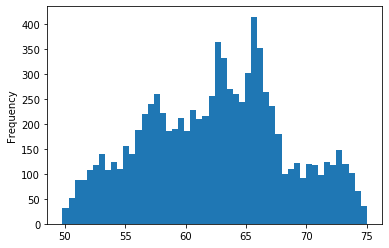

In [22]:
la.plot.hist(bins=50)

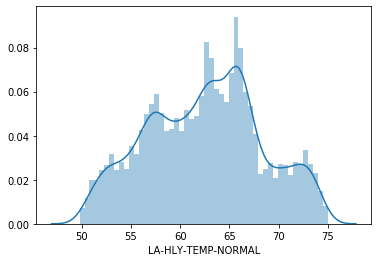

In [31]:
sea.distplot(la, bins=50)

###### Phoenix

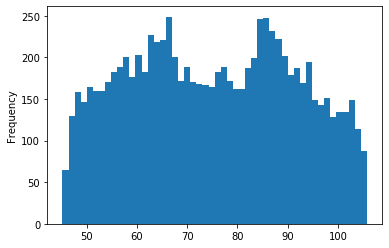

In [23]:
ph.plot.hist(bins=50)

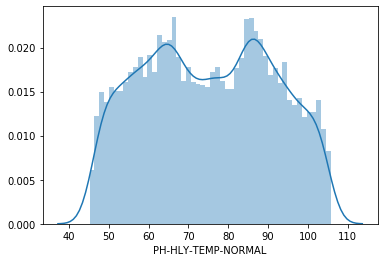

In [35]:
sea.distplot(ph, bins=50)

###### San Francisco

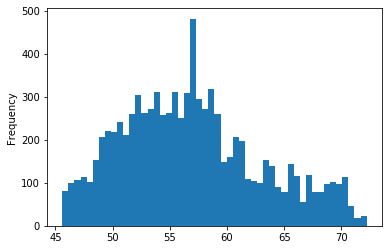

In [24]:
sf.plot.hist(bins=50)

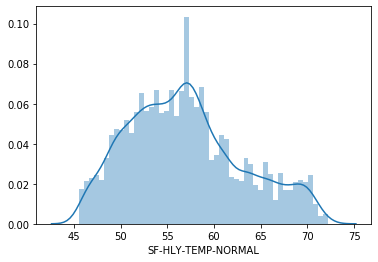

In [36]:
sea.distplot(sf, bins=50)

### Correlation between variables
In the plots and statistics bellow we can see the correlations between variables. 

Each three correlations are very strong positive correlations with the magnitude over 0.85. The highest positive correlation is between Los Angeles and San Francisco with magnitude almost 0.95. 


###### Correlation between Los Angeles and Phoenix

In [60]:
np.corrcoef(la, ph)

array([[1.        , 0.86316559],
       [0.86316559, 1.        ]])

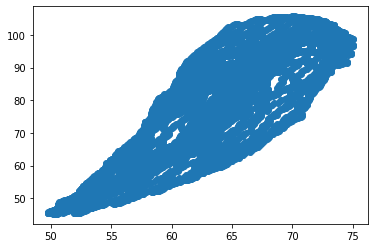

In [102]:
plt.scatter(la, ph)
plt.show()

###### Correlation between Los Angeles and San Francisco

In [106]:
np.corrcoef(la, sf)

array([[1.        , 0.94650315],
       [0.94650315, 1.        ]])

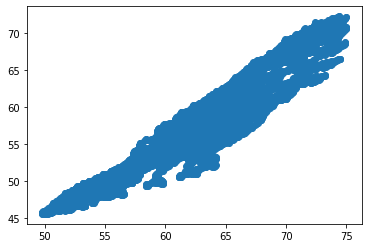

In [108]:
plt.scatter(la, sf)
plt.show()

###### Correlation between San Francisco and Phoenix

In [107]:
np.corrcoef(sf, ph)

array([[1.        , 0.87661543],
       [0.87661543, 1.        ]])

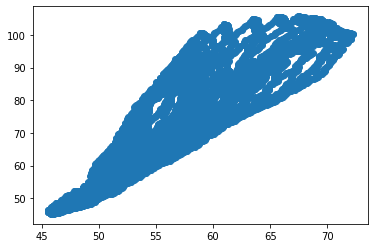

In [109]:
plt.scatter(sf, ph)
plt.show()

###### Compared correlations of all three cities

In [74]:
df.corr()

,LA-HLY-TEMP-NORMAL,PH-HLY-TEMP-NORMAL,SF-HLY-TEMP-NORMAL
LA-HLY-TEMP-NORMAL,1.000000,0.863166,0.946503
PH-HLY-TEMP-NORMAL,0.863166,1.000000,0.876615
SF-HLY-TEMP-NORMAL,0.946503,0.876615,1.000000


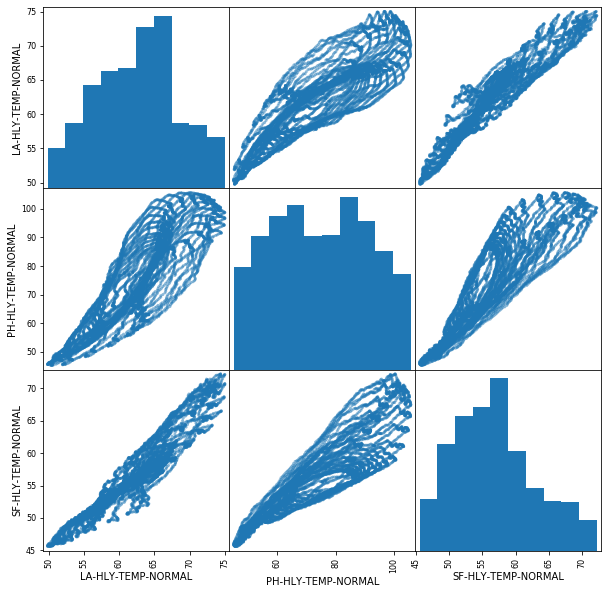

In [83]:
scatter_matrix(df, figsize=(10, 10))
plt.show()

Matrix of correlation of all three cities. 

0 - Los Angeles

1 - Phoenix

2 - San Francisco

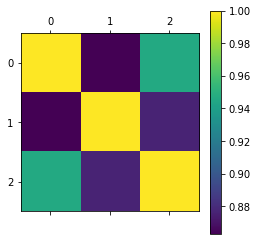

In [110]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

### Outliers
Very nice technique for detecting outliers is boxplot diagram. In the diagrams bellow we can see no outliers in any of the three cities. The same result we can see also in histograms above.

###### Los Angeles

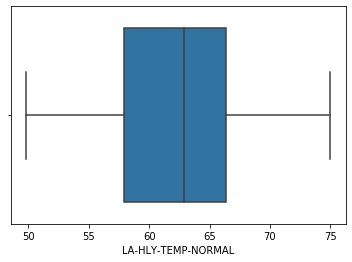

In [100]:
sea.boxplot(x=la)

###### Phoenix

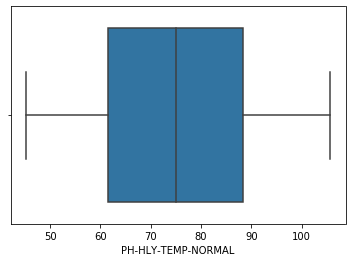

In [99]:
sea.boxplot(x=ph)

###### San Francisco

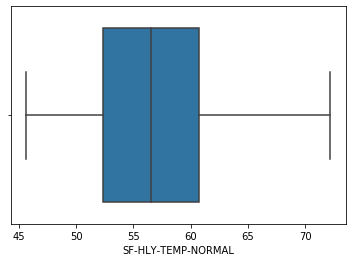

In [96]:
sea.boxplot(x=sf)